In [1]:
import matplotlib.pyplot as plt
from graph import Graph

In [2]:
# map_name = 'maps/test' 
map_name = 'maps/Helsinki'

In [3]:
%%time
# Create graph
g = Graph(map_name)

CPU times: user 8.62 s, sys: 1.46 s, total: 10.1 s
Wall time: 10.9 s


In [4]:
%%time
# Find nearest node
x, y = 26.9500, 60.5300
node_id, (xx, yy) = g.getNearestNode(x, y)

CPU times: user 1.18 ms, sys: 1.5 ms, total: 2.68 ms
Wall time: 1.44 ms


In [5]:
%%time
# Get random node ids
source, target = g.getRandomNodeId(), g.getRandomNodeId()

CPU times: user 16.2 ms, sys: 1.05 ms, total: 17.2 ms
Wall time: 18.7 ms


In [6]:
%%time
# A-star algorithm: approximate shortest path
a_star, (length, elevation) = g.aStarAlgorithm(source, target)
print(f"length: {length:.2f}, elevation: {elevation:.0f}")

length: 22311.14, elevation: 538
CPU times: user 123 ms, sys: 7.8 ms, total: 130 ms
Wall time: 147 ms


In [7]:
%%time
# Dijkstra algorithm: shortest path
dijkstra, (length, elevation) = g.dijkstraAlgorithm(source, target)
print(f"length: {length:.2f}, elevation: {elevation:.0f}")

length: 22297.74, elevation: 538
CPU times: user 797 ms, sys: 23.5 ms, total: 820 ms
Wall time: 862 ms


In [8]:
%%time
# Elena algorithm: minimum elevation gain within 150% of shortest path length
elena, (length, elevation) = g.findElevationBasedPath(source, target)
print(f"length: {length:.2f}, elevation: {elevation:.0f}")

length: 28365.71, elevation: 446
CPU times: user 3.09 s, sys: 95.6 ms, total: 3.18 s
Wall time: 3.38 s


In [9]:
%%time
# Get all edges to plot map
edges = g.getAllEdges()

CPU times: user 515 ms, sys: 17.9 ms, total: 533 ms
Wall time: 552 ms


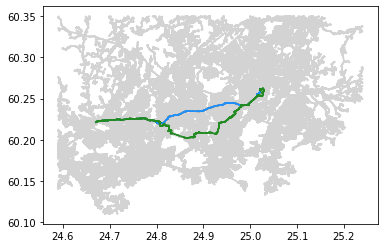

CPU times: user 2min 2s, sys: 58.9 s, total: 3min
Wall time: 3min 52s


In [10]:
%%time
# Plot results
for edge in edges:
    (x1, y1), (x2, y2) = edges
    plt.plot([x1, x2], [y1, y2], color='lightgray')

for path, color in [(a_star, 'darkorange'), (dijkstra, 'dodgerblue'), (elena, 'forestgreen')]:
    for i in range(len(path) - 1):
        plt.plot([path[i][0], path[i + 1][0]], [path[i][1], path[i + 1][1]], color=color)

plt.show()